In [41]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
mnist=fetch_openml('mnist_784', as_frame=False)
X_sample, y_sample=mnist.data[:5000], mnist.target[:5000]

In [32]:
tsne=TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
%time X_reduced=tsne.fit_transform(X_sample)

CPU times: total: 4min 14s
Wall time: 53.2 s


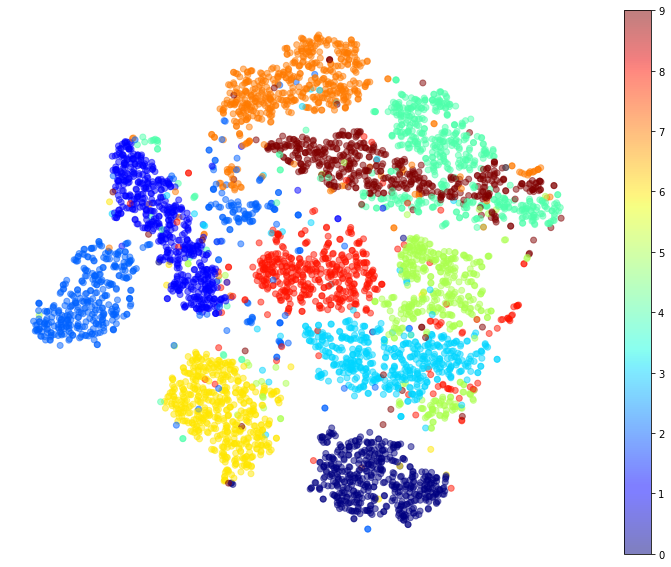

In [7]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

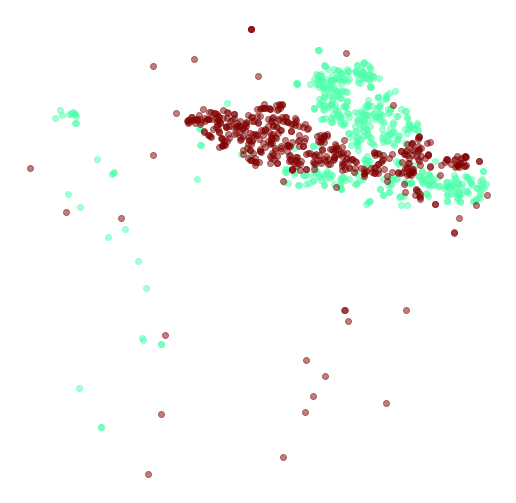

In [13]:
plt.figure(figsize=(9, 9))
cmap=plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_sample==digit, 0], X_reduced[y_sample==digit, 1], 
                c=[cmap(float(digit)/9)], alpha=0.5)
plt.axis('off')
plt.show()

In [14]:
idx=(y_sample=='4')|(y_sample=='9')
X_subset=X_sample[idx]
y_subset=y_sample[idx]

tsne_subset=TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
X_subset_reduced=tsne_subset.fit_transform(X_subset)

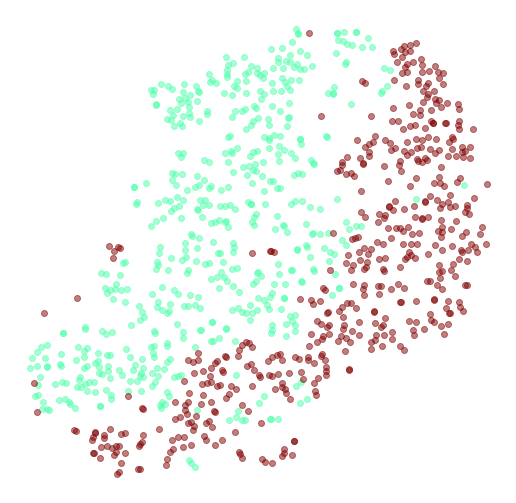

In [16]:
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset==digit, 0],
                X_subset_reduced[y_subset==digit, 1],
                c=[cmap(float(digit)/9)], alpha=0.5)
plt.axis('off')
plt.show()

In [23]:
def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    X_normalized=MinMaxScaler().fit_transform(X)
    neighbors=np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap=plt.cm.jet
    digits=np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y==digit, 0], X_normalized[y==digit, 1], 
                    c=[cmap(float(digit)/9)], alpha=0.5)
    plt.axis('off')

    ax=plt.gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance=np.linalg.norm(neighbors-image_coord, axis=1).min()
        if closest_distance>min_distance:
            neighbors=np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                        color=cmap(float(y[index])/9),
                        fontdict={'weight':'bold', 'size':16})
            else:
                image=images[index].reshape(28, 28)
                imagebox=AnnotationBbox(OffsetImage(image, cmap='binary'), image_coord)
                ax.add_artist(imagebox)

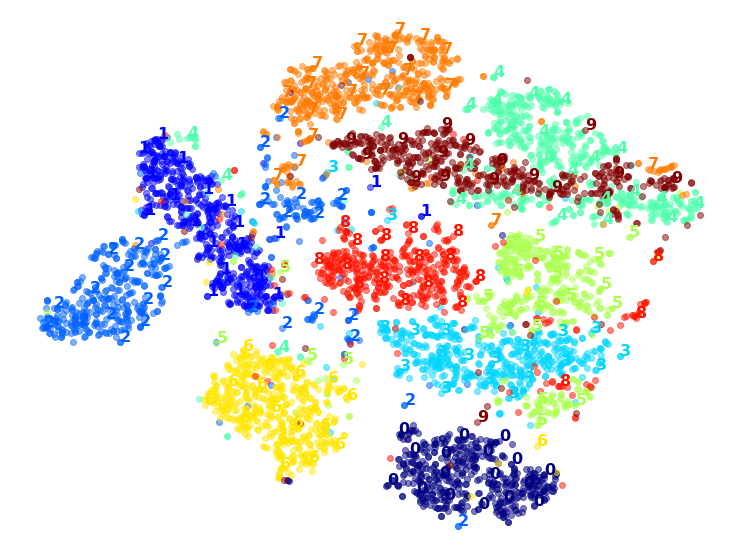

In [24]:
plot_digits(X_reduced, y_sample)

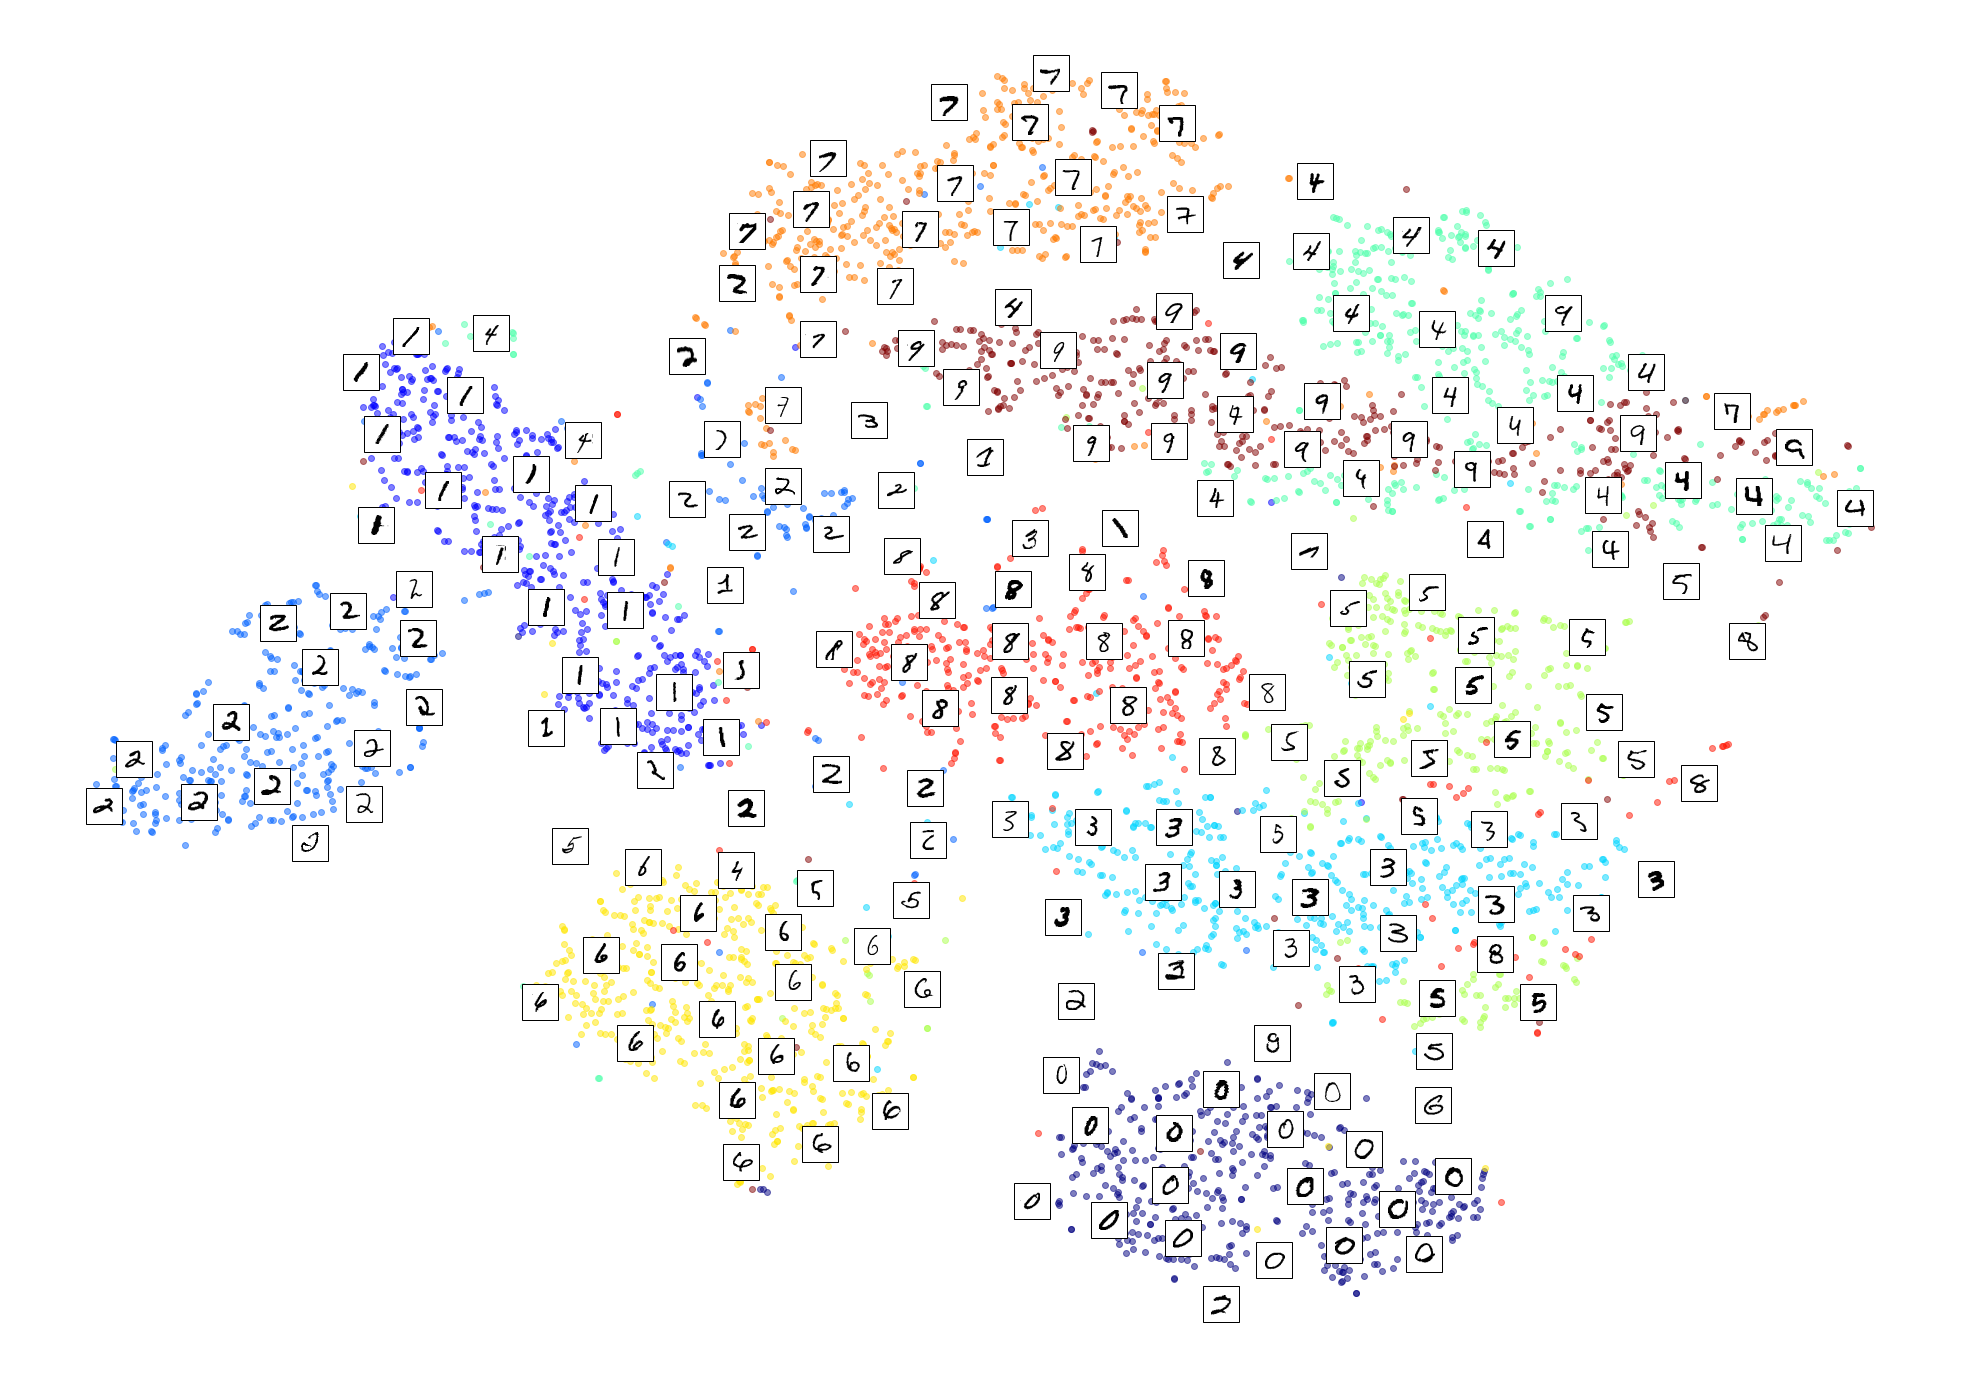

In [26]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35, 25))

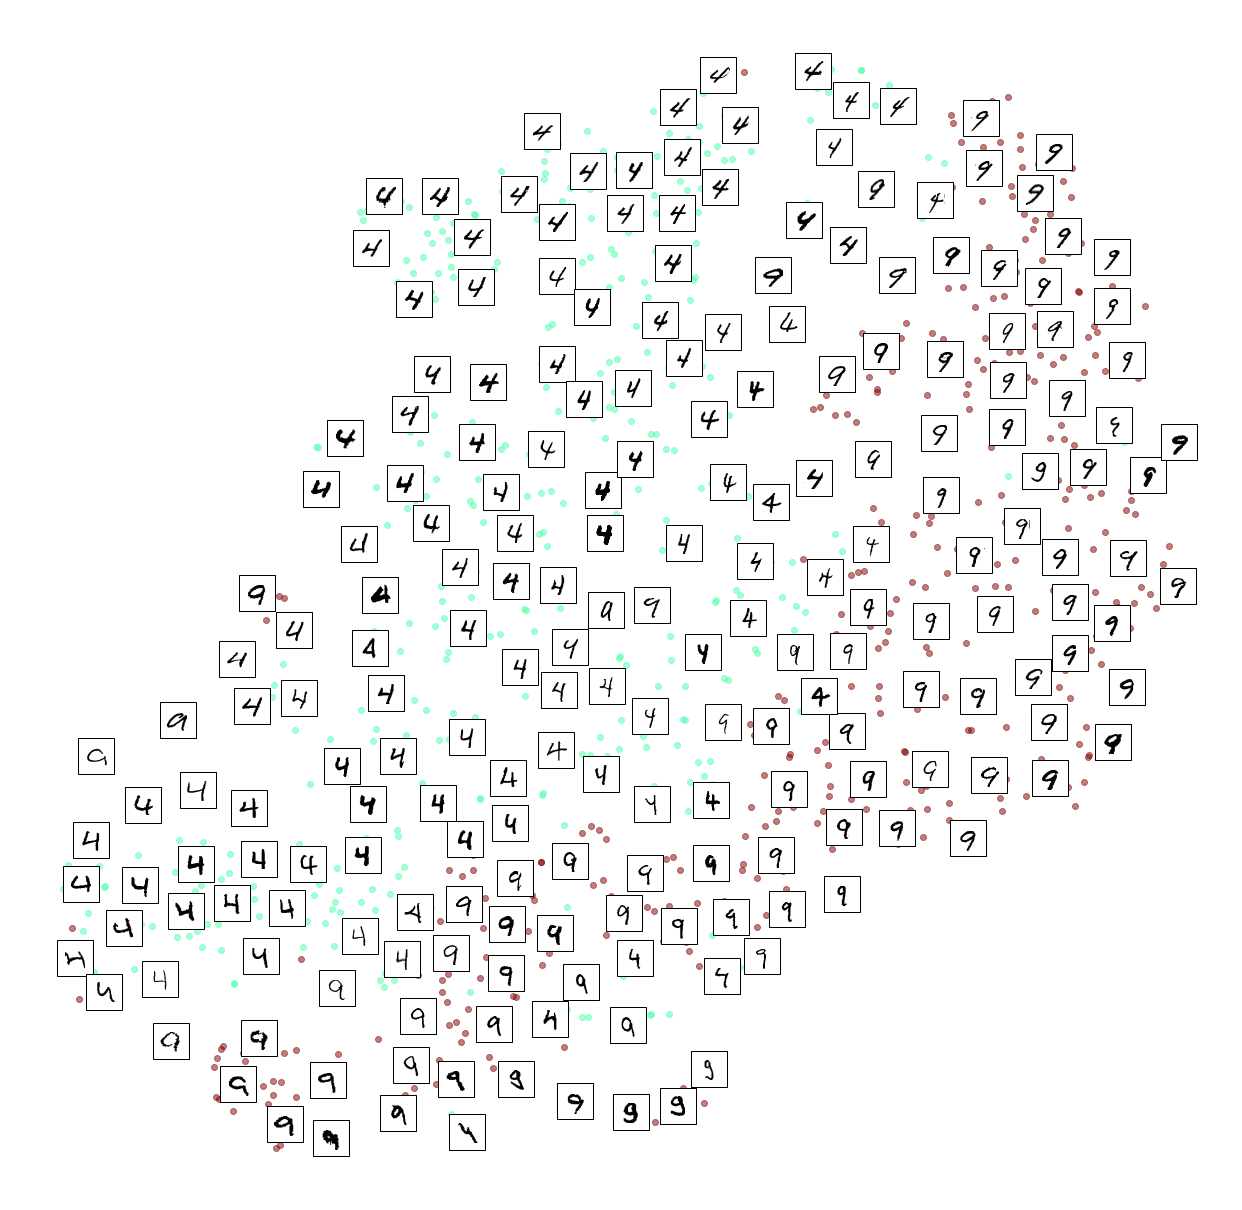

In [27]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

CPU times: total: 375 ms
Wall time: 294 ms


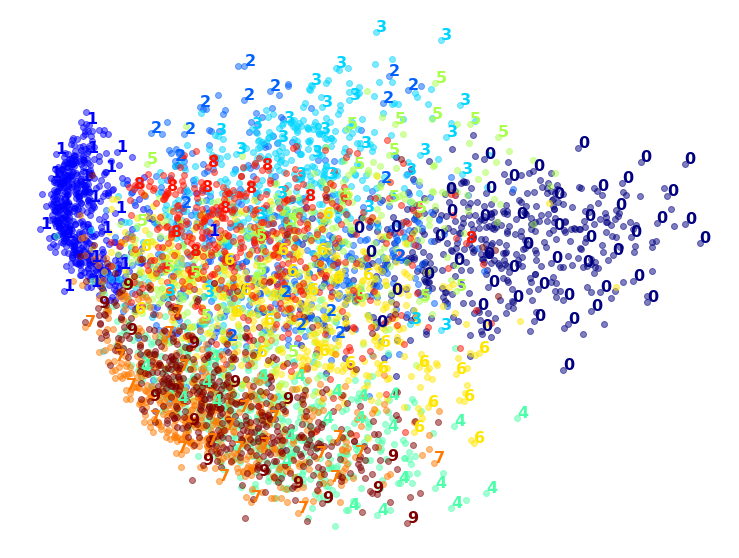

In [33]:
pca=PCA(n_components=2, random_state=42)
%time X_pca_reduced=pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)
plt.show()

CPU times: total: 5.62 s
Wall time: 11.6 s


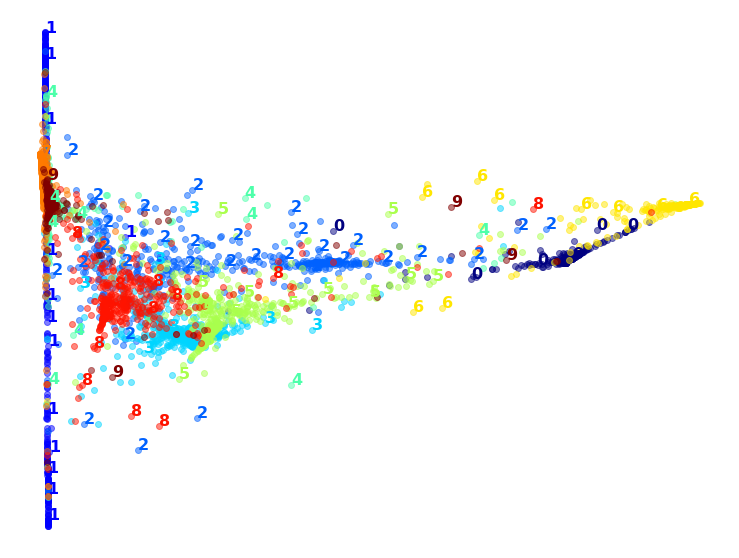

In [34]:
lle=LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced=lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)
plt.show()

CPU times: total: 5.44 s
Wall time: 11.6 s


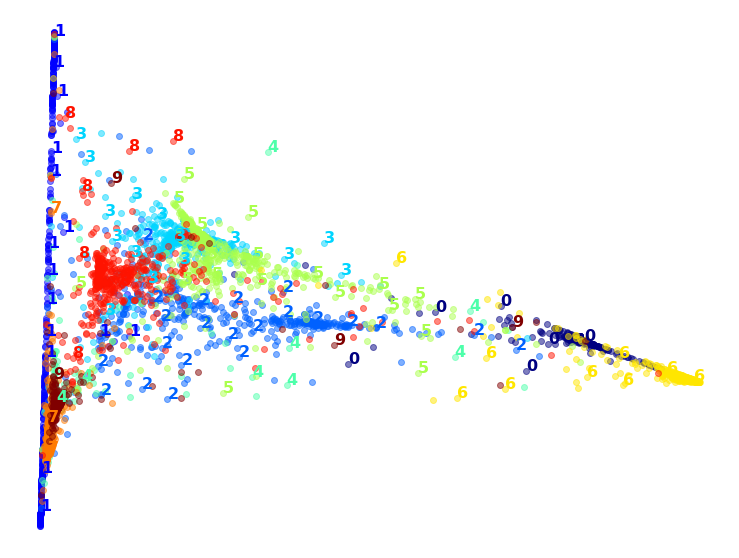

In [36]:
pca_lle=make_pipeline(
    PCA(n_components=0.95),
    LocallyLinearEmbedding(n_components=2, random_state=42)
)

%time X_pca_lle_reduced=pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

CPU times: total: 24min 22s
Wall time: 18min 27s


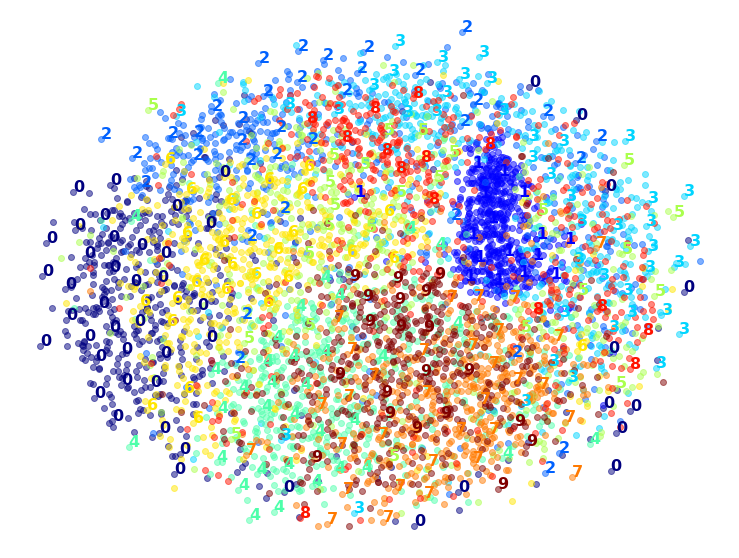

In [37]:
%time X_mds_reduced=MDS(n_components=2, random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()

CPU times: total: 1.38 s
Wall time: 2.25 s


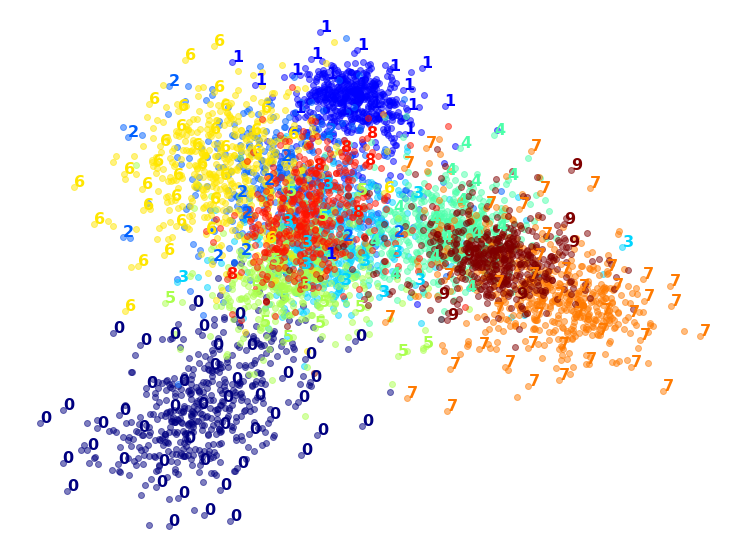

In [44]:
lda=LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced=lda.fit_transform(X_sample, y_sample)
plot_digits(X_lda_reduced, y_sample)
plt.show()